In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:/Users/kishor shetty B/Downloads/covid_19_data.csv')
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
306424,306425,05/29/2021,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,306426,05/29/2021,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,306427,05/29/2021,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,306428,05/29/2021,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0


In [3]:
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              306429 non-null  int64  
 1   ObservationDate  306429 non-null  object 
 2   Province/State   228326 non-null  object 
 3   Country/Region   306429 non-null  object 
 4   Last Update      306429 non-null  object 
 5   Confirmed        306429 non-null  float64
 6   Deaths           306429 non-null  float64
 7   Recovered        306429 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 18.7+ MB


In [5]:
df.isnull().sum()

SNo                    0
ObservationDate        0
Province/State     78103
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

In [8]:
df['Province/State'] = df['Province/State'].fillna('Unknown')
df.isnull().sum()

SNo                0
ObservationDate    0
Province/State     0
Country/Region     0
Last Update        0
Confirmed          0
Deaths             0
Recovered          0
dtype: int64

In [9]:
print(df['ObservationDate'].dtype)

object


In [10]:
# Converting ObservationDate and Last Update to datetime format
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'], format = '%m/%d/%Y')
print(df['ObservationDate'].dtype)

datetime64[ns]


In [26]:
df['Country/Region'].nunique()

229

In [24]:
df['Province/State'].nunique()

736

In [27]:
df.duplicated().sum()

0

In [28]:
print(df[['Confirmed', 'Deaths', 'Recovered']].describe())


          Confirmed         Deaths     Recovered
count  3.064290e+05  306429.000000  3.064290e+05
mean   8.567190e+04    2036.404351  5.042314e+04
std    2.775508e+05    6410.937689  2.015058e+05
min    0.000000e+00       0.000000  0.000000e+00
25%    1.042000e+03      13.000000  1.100000e+01
50%    1.037500e+04     192.000000  1.751000e+03
75%    5.075200e+04    1322.000000  2.027000e+04
max    5.863138e+06  112385.000000  6.399531e+06


In [30]:
df.describe()

,SNo,ObservationDate,Confirmed,Deaths,Recovered
count,306429.000000,306429,3.064290e+05,306429.000000,3.064290e+05
mean,153215.000000,2020-11-06 01:54:54.146441728,8.567190e+04,2036.404351,5.042314e+04
min,1.000000,2020-01-22 00:00:00,0.000000e+00,0.000000,0.000000e+00
25%,76608.000000,2020-07-30 00:00:00,1.042000e+03,13.000000,1.100000e+01
50%,153215.000000,2020-11-10 00:00:00,1.037500e+04,192.000000,1.751000e+03
75%,229822.000000,2021-02-18 00:00:00,5.075200e+04,1322.000000,2.027000e+04
max,306429.000000,2021-05-29 00:00:00,5.863138e+06,112385.000000,6.399531e+06
std,88458.577156,NaN,2.775508e+05,6410.937689,2.015058e+05


In [11]:
# replacing negative values with 0 in the 'Confirmed', 'Deaths', and 'Recovered' columns
df['Confirmed'] = df['Confirmed'].apply(lambda x: x if x>=0 else 0)
df['Deaths'] = df['Deaths'].apply(lambda x: x if x>=0 else 0)
df['Recovered'] = df['Recovered'].apply(lambda x: x if x>=0 else 0)

In [12]:
#Checking for Negative Values
negative_counts = (df[['Confirmed','Deaths','Recovered']]< 0).sum()
print(negative_counts)

Confirmed    0
Deaths       0
Recovered    0
dtype: int64


In [13]:
df.tail()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
306424,306425,2021-05-29,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,306426,2021-05-29,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,306427,2021-05-29,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,306428,2021-05-29,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0
306428,306429,2021-05-29,Zuid-Holland,Netherlands,2021-05-30 04:20:55,391559.0,4252.0,0.0


In [104]:
# 1.What is the total number of confirmed cases worldwide?
df['Confirmed'].sum()

26252354602.0

In [107]:
#2.How many deaths have been reported globally?
df['Deaths'].sum()

624013349.0

In [7]:
#3.What is the total number of recovered cases worldwide?
df['Recovered'].sum()

15450237912.0

In [5]:
#4.How many countries/regions are represented in the dataset?
df['Country/Region'].nunique()

229

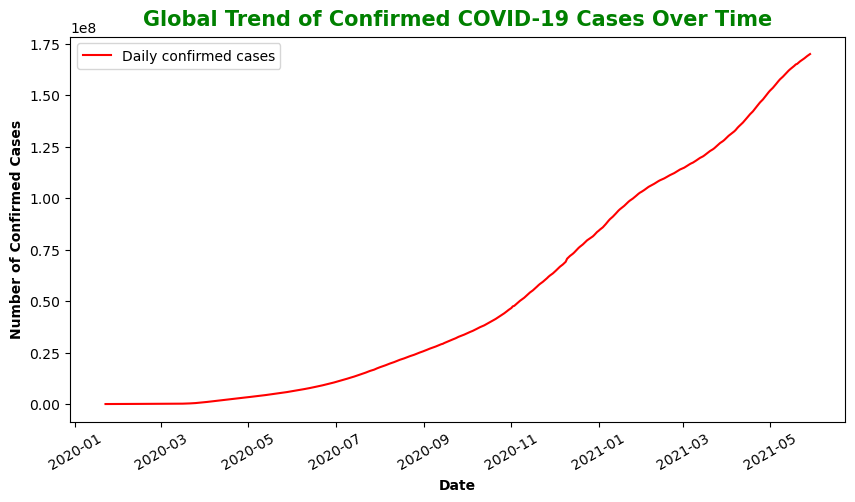

In [32]:
#5. What is the trend of confirmed cases over time globally?

daily_confirmed = df.groupby('ObservationDate')['Confirmed'].sum()

plt.figure(figsize=(10,5))
plt.plot(daily_confirmed.index, daily_confirmed.values, label = 'Daily confirmed cases', c = 'red')
plt.title('Global Trend of Confirmed COVID-19 Cases Over Time', size = 15, pad = 8, c = 'green', weight = 'bold')
plt.xlabel('Date', c ='black', weight ='bold')
plt.ylabel('Number of Confirmed Cases',c ='black', weight ='bold')
plt.legend()
plt.xticks(rotation=30)
plt.show()

In [46]:
#6. Which province/state has reported the highest number of confirmed cases?
df.groupby('Province/State')['Confirmed'].sum().sort_values(ascending = False).head(1)

Province/State
Unknown    7.945260e+09
Name: Confirmed, dtype: float64

In [45]:
#7. Which country/region has the highest number of deaths?
df.groupby(by='Country/Region')['Deaths'].sum().sort_values(ascending=False).head(1)

Country/Region
US    123303762.0
Name: Deaths, dtype: float64

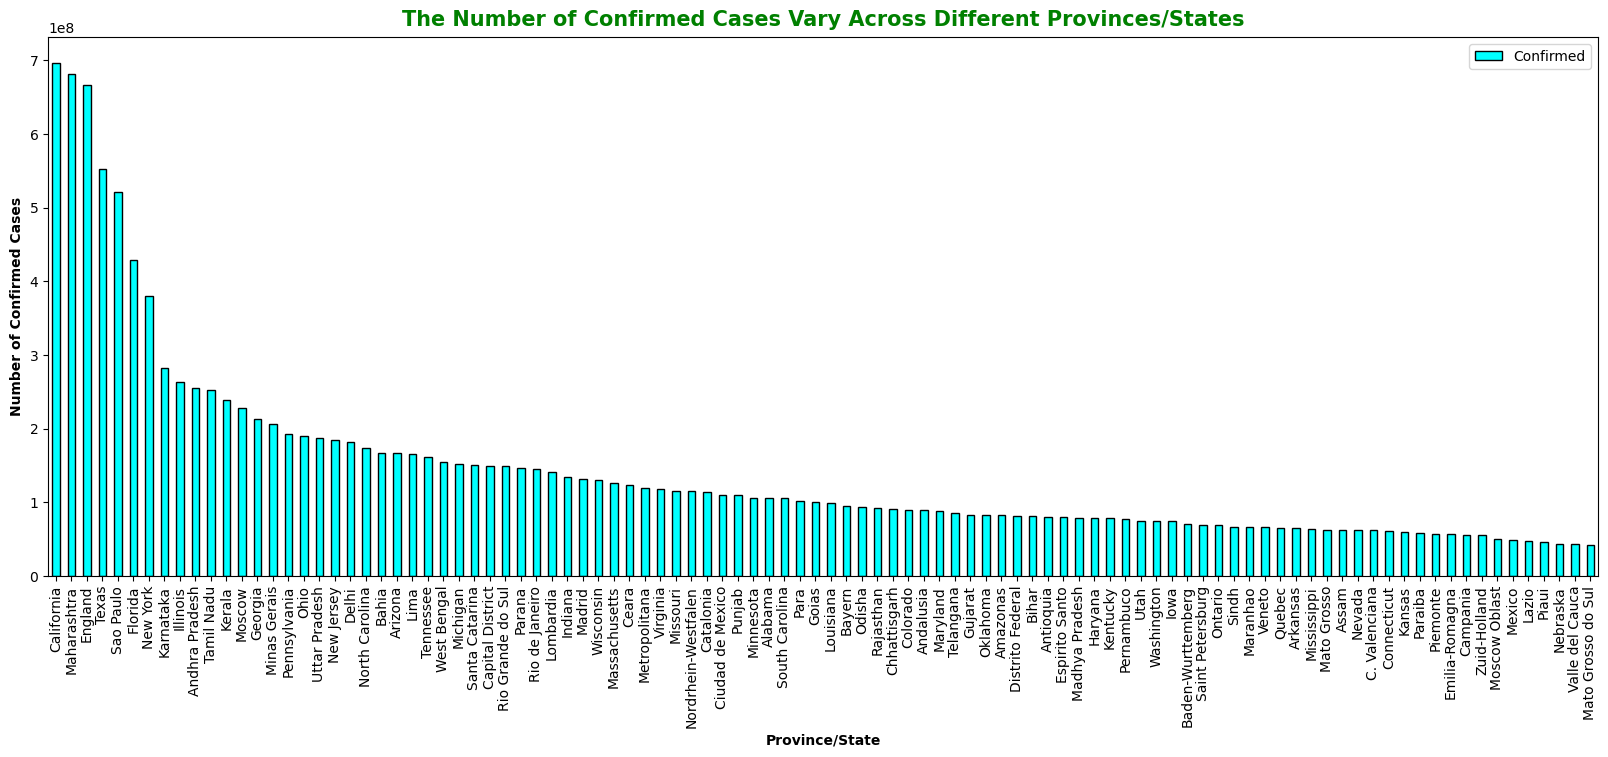

In [34]:
#8. How does the number of confirmed cases vary across different provinces/states?

daily_confirmed_case = df.groupby(['Province/State'])['Confirmed'].sum()
plt.figure(figsize=(20,7))
daily_confirmed_case.sort_values(ascending = False).head(100).plot(kind='bar', color='Cyan', edgecolor = 'k')
plt.xlabel('Province/State', c = 'black', weight = 'bold')
plt.title('The Number of Confirmed Cases Vary Across Different Provinces/States', size = 15, pad = 8, c = 'green', weight = 'bold')
plt.ylabel('Number of Confirmed Cases',  c = 'black', weight = 'bold')
plt.legend()
plt.show()

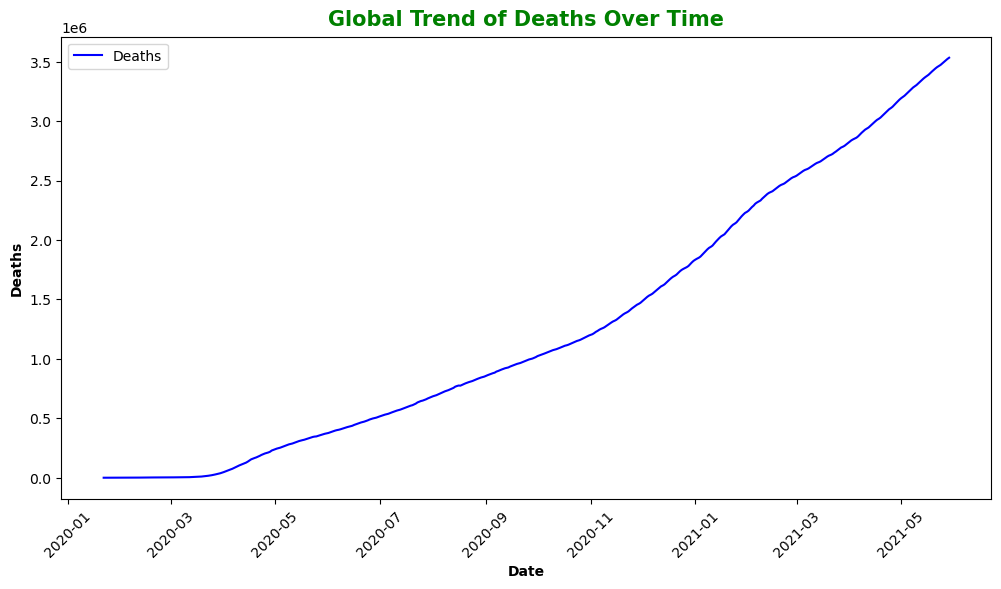

In [13]:
#9. What is the trend of deaths over time globally?

global_deaths_trend = df.groupby('ObservationDate')['Deaths'].sum()
plt.figure(figsize=(12, 6))
plt.plot(global_deaths_trend.index, global_deaths_trend, label='Deaths', color='blue')
plt.title('Global Trend of Deaths Over Time', size = 15, pad = 8, c = 'green', weight = 'bold')
plt.xlabel('Date', c = 'black', weight = 'bold')
plt.ylabel('Deaths',c = 'black', weight = 'bold')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [7]:
# 10.Which country/region has the highest number of recovered cases?
highest_recoverd_case = df.groupby('Country/Region')['Recovered'].sum()
max_recovered_country_region = highest_recoverd_case.idxmax()
recoverd_case = highest_recoverd_case.max()
print(f'{max_recovered_country_region}\n{recoverd_case}')

India
2900589824.0


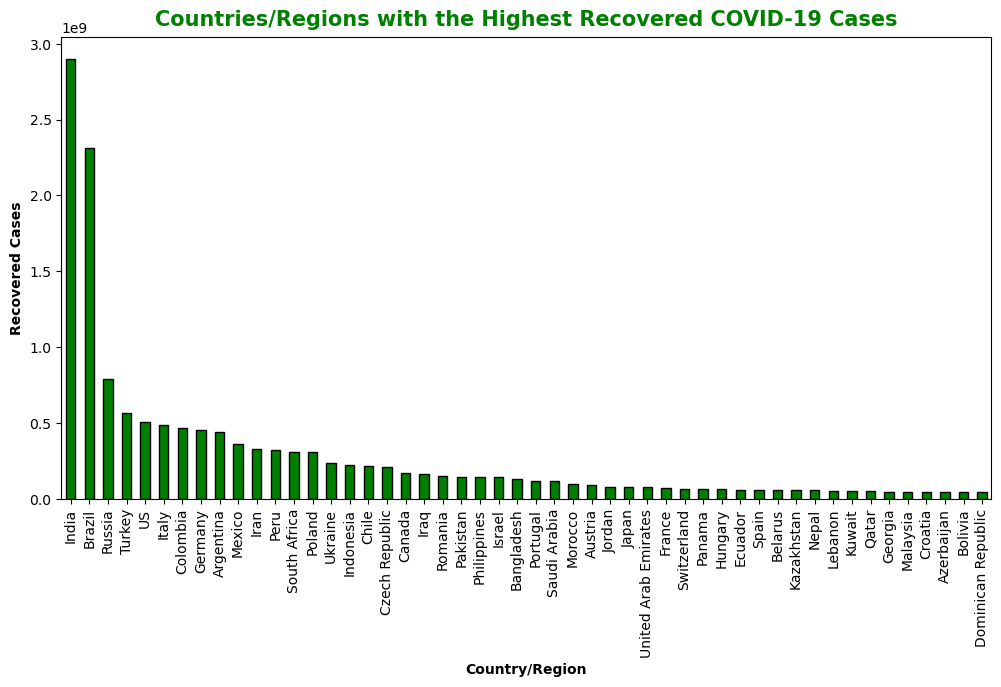

In [8]:
# 11.How does the number of recovered cases vary across different countries/regions?
country_recovered = df.groupby('Country/Region')['Recovered'].sum()
country_recovered_sorted = country_recovered.sort_values(ascending=False)
plt.figure(figsize=(12, 6))
country_recovered_sorted.head(50).plot(kind='bar', color='green', edgecolor = 'k')
plt.title('Countries/Regions with the Highest Recovered COVID-19 Cases', size=15, pad=8, c='green', weight='bold')
plt.xlabel('Country/Region', c='black', weight='bold')
plt.ylabel('Recovered Cases', c='black', weight='bold')
plt.xticks(rotation=90)
plt.show()

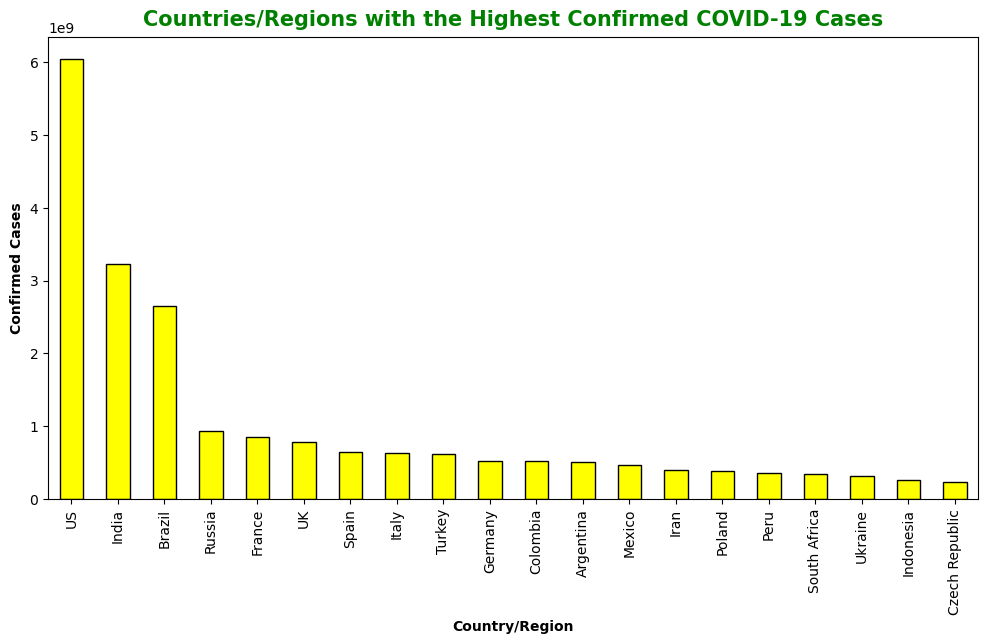

In [84]:
# 12.What is the distribution of confirmed cases by country/region?
country_confirmed = df.groupby('Country/Region')['Confirmed'].sum()
sorted_country_confirmed = country_confirmed.sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sorted_country_confirmed.head(20).plot(kind='bar', color='yellow', edgecolor = 'k')
plt.title('Countries/Regions with the Highest Confirmed COVID-19 Cases', size=15, pad=8, c='green', weight='bold')
plt.xlabel('Country/Region', c='black', weight='bold')
plt.ylabel('Confirmed Cases', c='black', weight='bold')
plt.xticks(rotation=90)
plt.show()

In [93]:
# 13.Is there a correlation between the number of confirmed cases and deaths?
correlation1 = df['Confirmed'].corr(df['Deaths'])
print(f'Correlation between the number of confirmed cases and deaths: {correlation1}')


Correlation between the number of confirmed cases and deaths: 0.8884175559635876


In [92]:
# 14.Is there a correlation between the number of confirmed cases and recovered cases?
correlation2 = df['Confirmed'].corr(df['Recovered'])
print(f'Correlation between the number of confirmed cases and recovered cases: {correlation2}')


Correlation between the number of confirmed cases and recovered cases: 0.6334967967331256


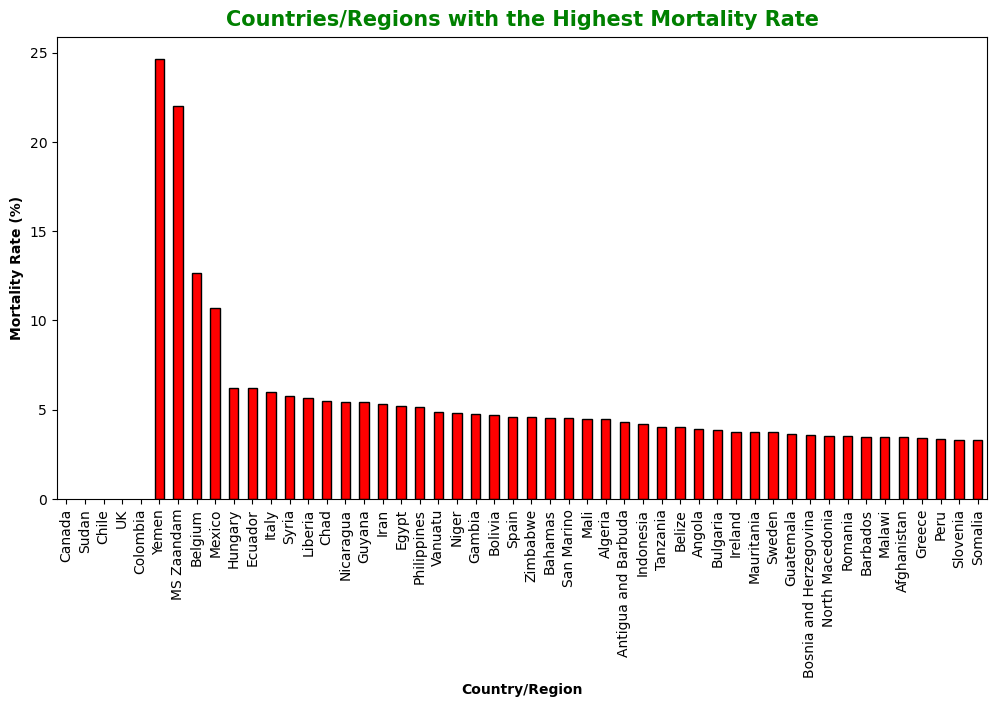

In [101]:
# 15.How does the mortality rate vary across different countries/regions?

# Calculating the mortality rate for each country/region
df['Mortality Rate'] = (df['Deaths'] / df['Confirmed']) * 100

country_mortality_rate = df.groupby('Country/Region')['Mortality Rate'].mean()

country_mortality_rate_sorted = country_mortality_rate.sort_values(ascending=False)
plt.figure(figsize=(12, 6))
country_mortality_rate_sorted.head(50).plot(kind='bar', color='red', edgecolor = 'k')
plt.title('Countries/Regions with the Highest Mortality Rate', size=15, pad=8, c='green', weight='bold')
plt.xlabel('Country/Region', c='black', weight='bold')
plt.ylabel('Mortality Rate (%)', c='black', weight='bold')
plt.xticks(rotation=90)
plt.show()

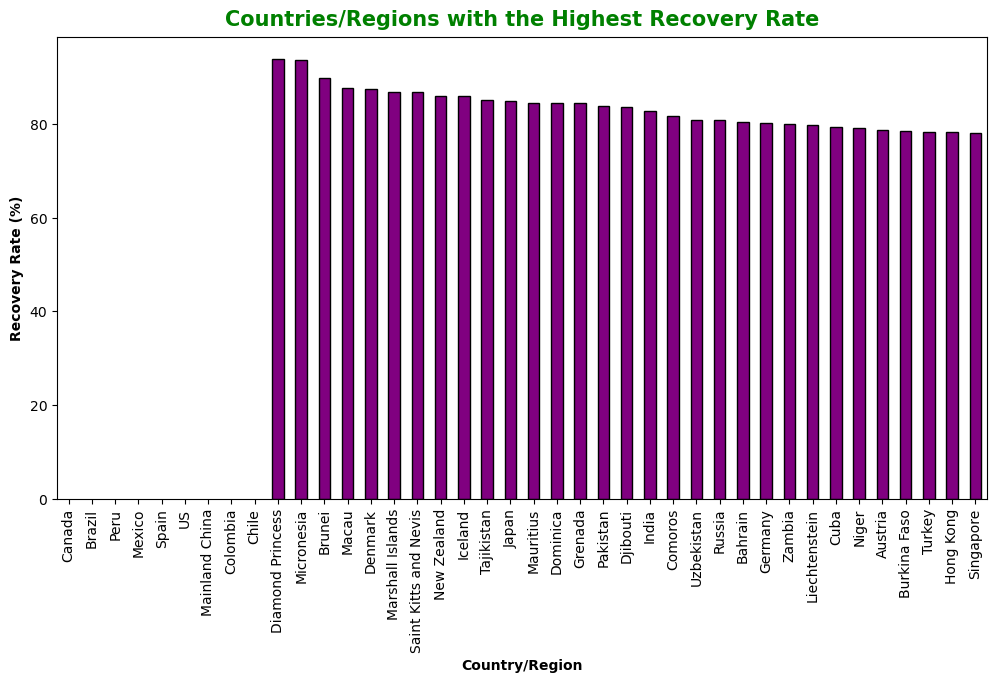

In [109]:
# 16.How does the recovery rate vary across different countries/regions?

# Calculating the Recovered rate for each country/region
df['Recovery Rate'] = (df['Recovered'] / df['Confirmed']) * 100

# Grouping by Country/Region and calculating the average mortality rate
country_recovered_rate = df.groupby('Country/Region')['Recovery Rate'].mean()

country_recovered_rate_sorted = country_recovered_rate.sort_values(ascending=False)
plt.figure(figsize=(12, 6))
country_recovered_rate_sorted.head(40).plot(kind='bar', color='purple', edgecolor = 'k')
plt.title('Countries/Regions with the Highest Recovery Rate', size=15, pad=8, c='green', weight='bold')
plt.xlabel('Country/Region', c='black', weight='bold')
plt.ylabel('Recovery Rate (%)', c='black', weight='bold')
plt.xticks(rotation=90)
plt.show()

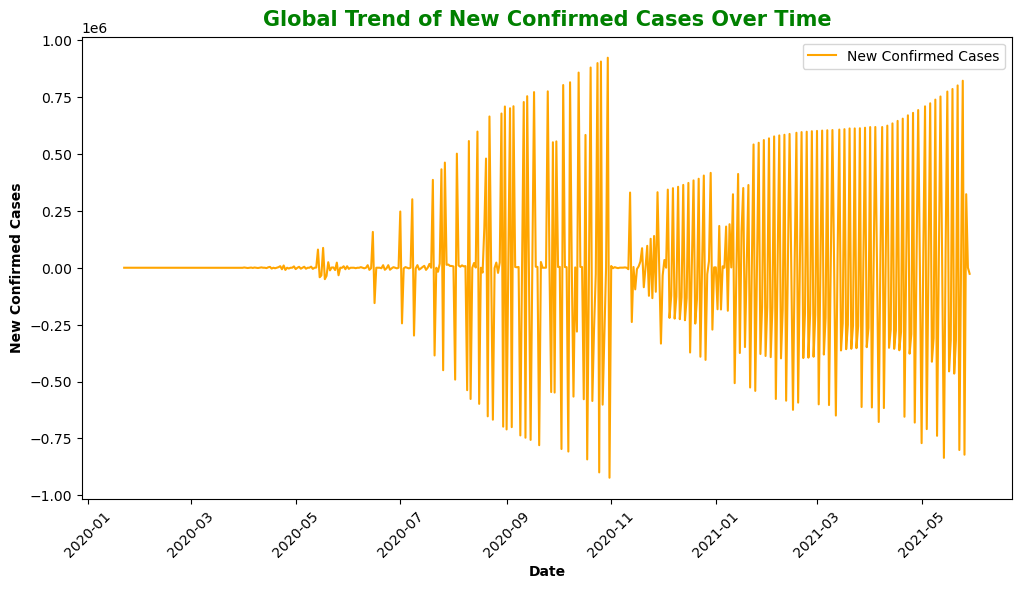

In [35]:
# 17.What is the trend of new confirmed cases over time globally?

# Sorting the data by 'ObservationDate' in time order
df_sorted = df.sort_values(by='ObservationDate')

# Calculatiing the new confirmed cases by subtracting the previous day's confirmed cases
df_sorted['New Confirmed'] = df_sorted['Confirmed'].diff()

new_confirmed_trend = df_sorted.groupby('ObservationDate')['New Confirmed'].sum()

plt.figure(figsize=(12, 6))
plt.plot(new_confirmed_trend.index, new_confirmed_trend, label='New Confirmed Cases', color='orange')

plt.title('Global Trend of New Confirmed Cases Over Time', size=15, pad=8, c='green', weight='bold')
plt.xlabel('Date', c='black', weight='bold')
plt.ylabel('New Confirmed Cases', c='black', weight='bold')
plt.legend()
plt.xticks(rotation=45)
plt.show()

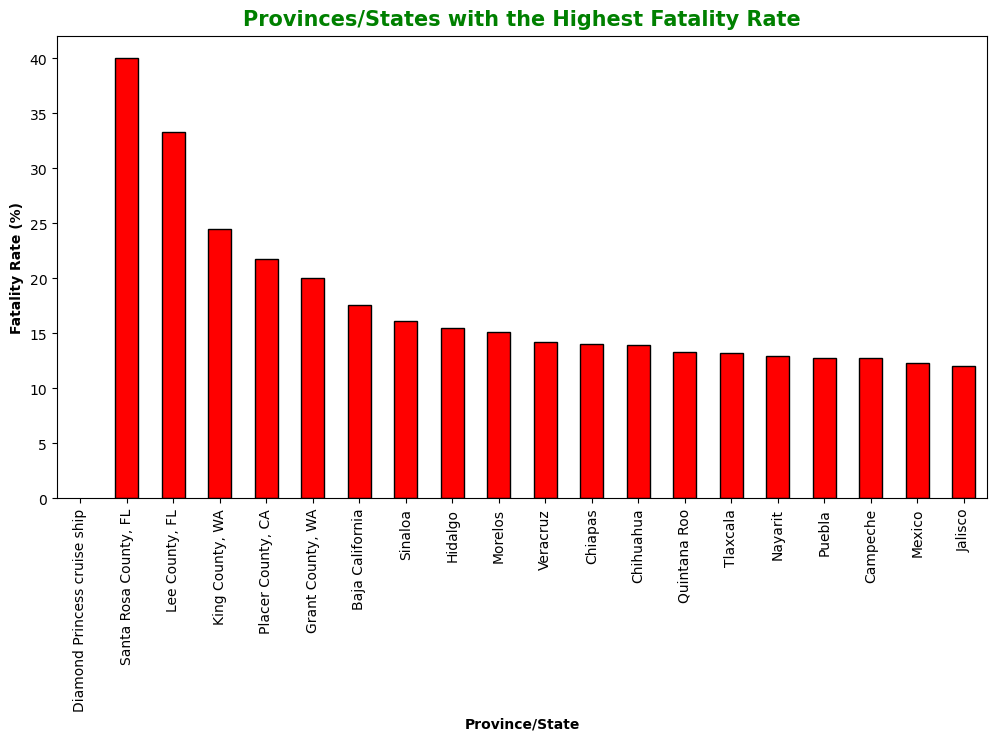

In [22]:
# 18.How does the fatality rate vary across different provinces/states?

# Calculating the fatality rate for each province/state
df['Fatality Rate'] = (df['Deaths'] / df['Confirmed']) * 100

province_fatality_rate = df.groupby('Province/State')['Fatality Rate'].mean()

# Sorting the values in descending order
province_fatality_rate_sorted = province_fatality_rate.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
province_fatality_rate_sorted.head(20).plot(kind='bar', color='red', edgecolor = 'k')

plt.title('Provinces/States with the Highest Fatality Rate', size=15, pad=8, c='green', weight='bold')
plt.xlabel('Province/State', c='black', weight='bold')
plt.ylabel('Fatality Rate (%)', c='black', weight='bold')
plt.xticks(rotation=90)
plt.show()


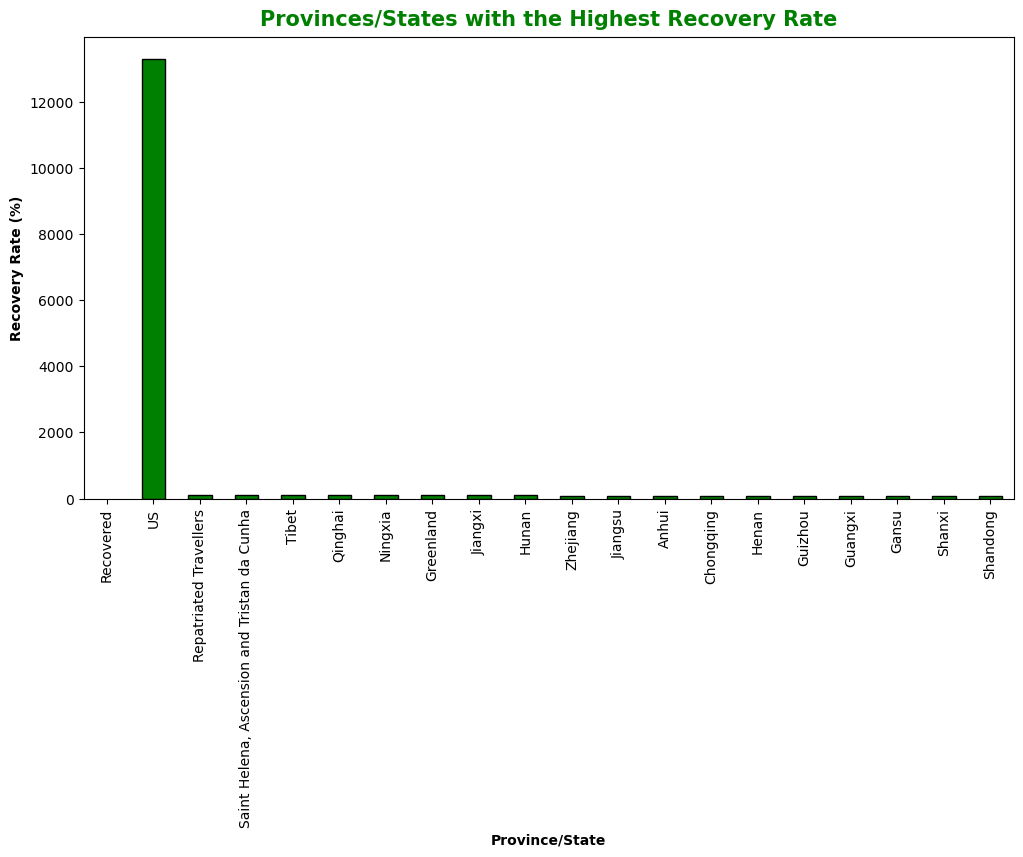

In [9]:
# 19.How does the recovery rate vary across different provinces/states?
# Calculating the recovery rate for each province/state
df['Recovery Rate'] = (df['Recovered'] / df['Confirmed']) * 100

province_recovery_rate = df.groupby('Province/State')['Recovery Rate'].mean()

# Sorting the values in descending order
province_recovery_rate_sorted = province_recovery_rate.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
province_recovery_rate_sorted.head(20).plot(kind='bar', color='green', edgecolor = 'k')

plt.title('Provinces/States with the Highest Recovery Rate', size=15, pad=8, c='green', weight='bold')
plt.xlabel('Province/State', c='black', weight='bold')
plt.ylabel('Recovery Rate (%)', c='black', weight='bold')
plt.xticks(rotation=90)
plt.show()


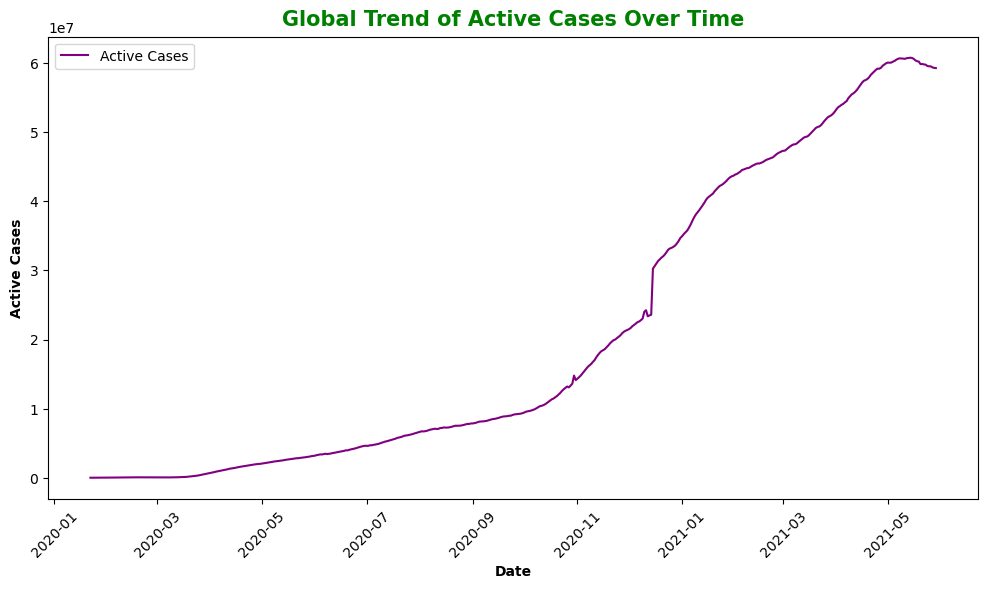

In [14]:
# 20.What is the trend of active cases over time globally? 
# Calculating the active cases for each record
df['Active Cases'] = df['Confirmed'] - df['Deaths'] - df['Recovered']

active_cases_trend = df.groupby('ObservationDate')['Active Cases'].sum()

plt.figure(figsize=(12, 6))
plt.plot(active_cases_trend.index, active_cases_trend, label='Active Cases', color='purple')

plt.title('Global Trend of Active Cases Over Time', size=15, pad=8, c='green', weight='bold')
plt.xlabel('Date', c='black', weight='bold')
plt.ylabel('Active Cases', c='black', weight='bold')
plt.legend()
plt.xticks(rotation=45)
plt.show()